In [1]:
from ECStripLengthNoiseComparison import ECStripLengthNoiseComparison

In [2]:
subtypes = []
allBarrelSubtypes = ["SSX", "SSY", "LSX", "LSY"]
with open("../Helpers/subtypes.txt", 'r') as f:
    allECSubtypes = f.read().split(',')
allSubtypes = []
allSubtypes.extend(allECSubtypes)
allSubtypes.extend(allBarrelSubtypes)
subtypes = allSubtypes


Number of R0H0 hybrids: 8
Subtype R0H0 has strip lengths 1.900 2.400


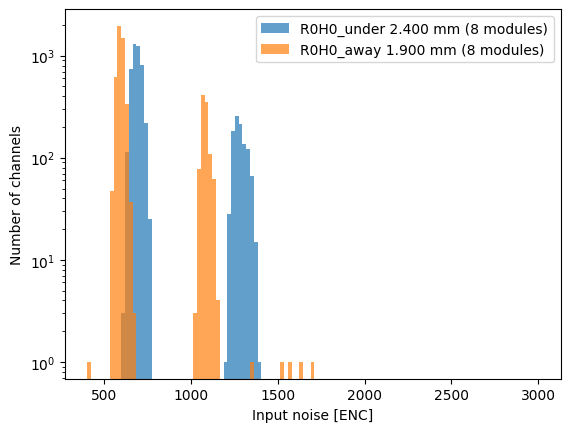


Number of R0H1 hybrids: 8
Subtype R0H1 has strip lengths 3.200 2.900


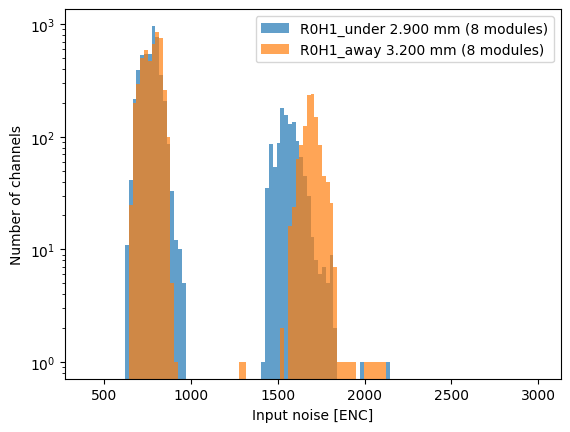


Number of R1H0 hybrids: 12
Subtype R1H0 has strip lengths 1.810 2.710


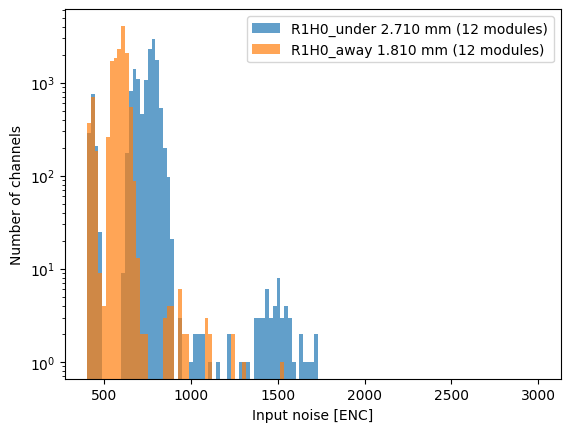


Number of R1H1 hybrids: 9
Subtype R1H1 has strip lengths 1.510 2.410


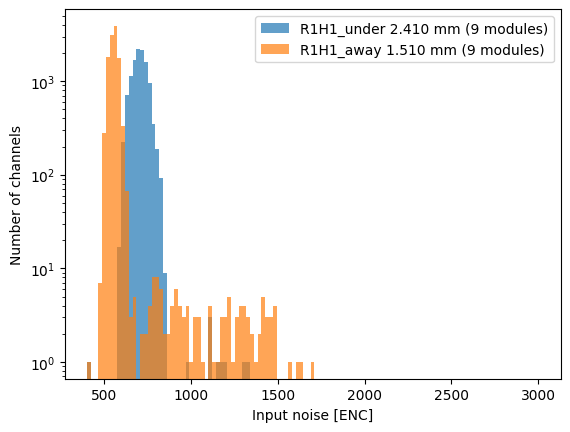


Number of R2H0 hybrids: 24
Subtype R2H0 has strip lengths 3.080 3.080


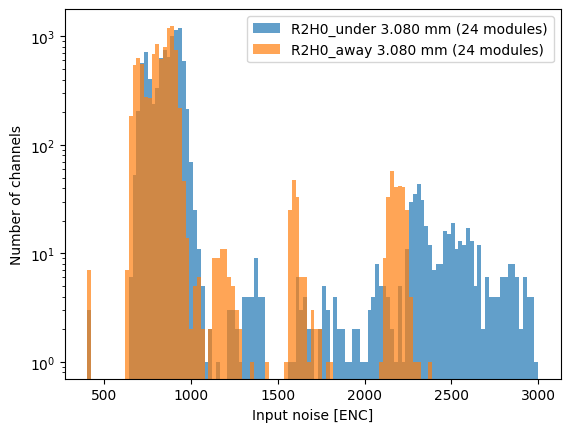


Number of R3H0 hybrids: 4
Subtype R3H0 has strip lengths 2.620 3.220


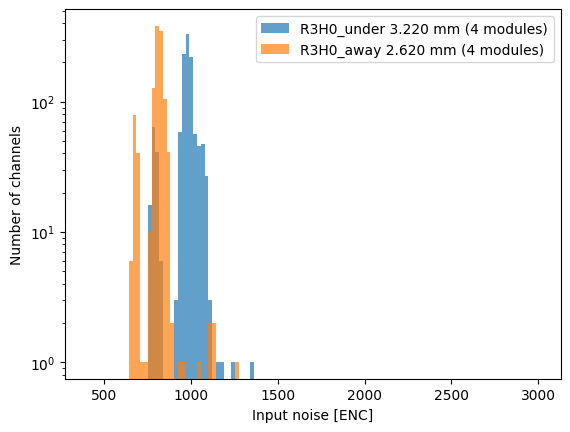


Number of R3H1 hybrids: 4
Subtype R3H1 has strip lengths 2.620 3.220


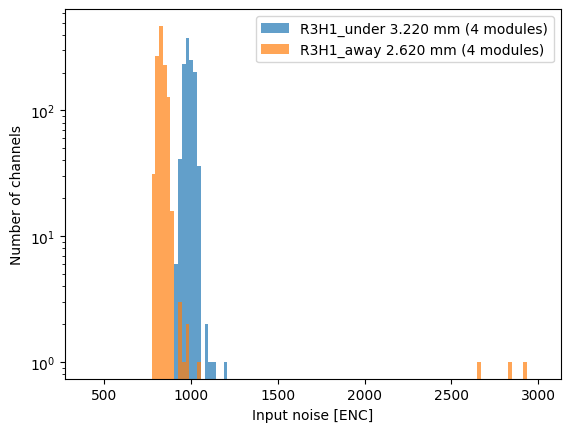


Number of R3H2 hybrids: 4
Subtype R3H2 has strip lengths 2.620 3.220


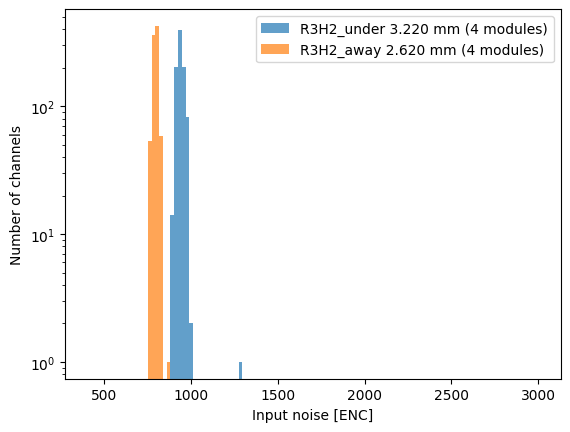


Number of R3H3 hybrids: 4
Subtype R3H3 has strip lengths 2.620 3.220


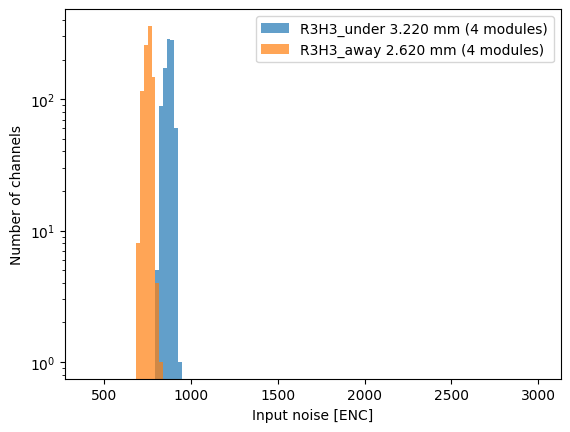


Number of R4H0 hybrids: 10
Subtype R4H0 has strip lengths 5.460 5.460


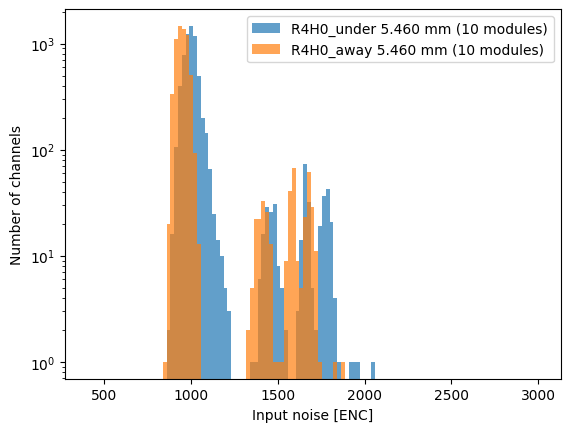


Number of R4H1 hybrids: 10
Subtype R4H1 has strip lengths 5.460 5.460


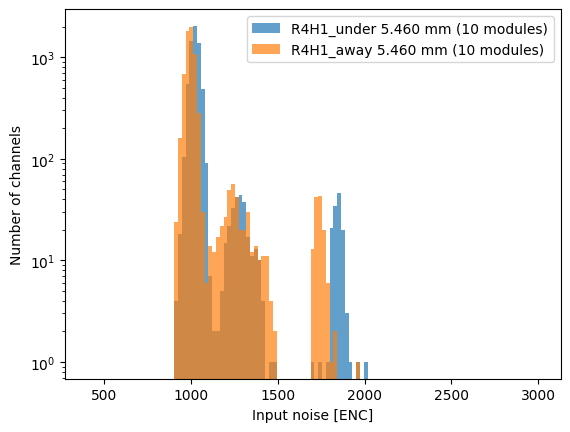


Number of R5H0 hybrids: 4
Subtype R5H0 has strip lengths 4.020 6.020


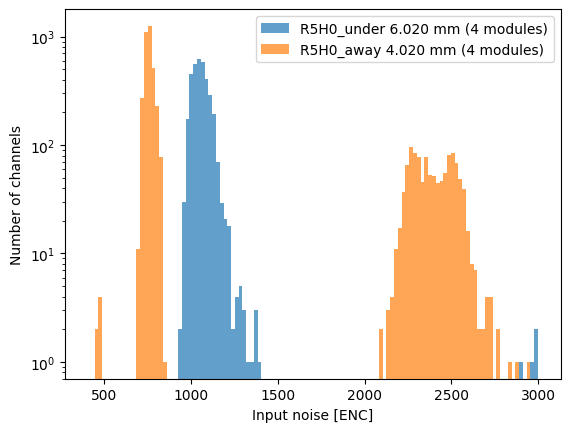


Number of R5H1 hybrids: 4
Subtype R5H1 has strip lengths 4.020 6.020


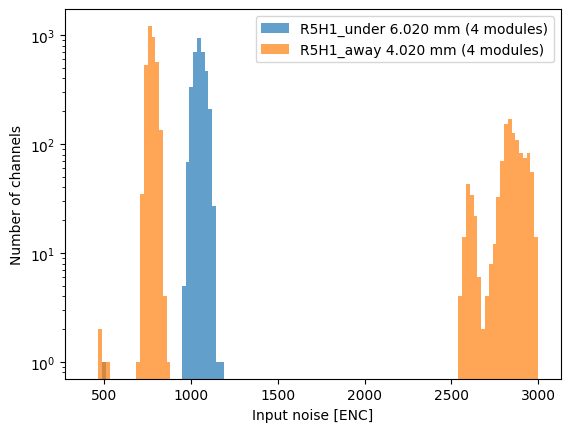

Number of SSX hybrids: 9

Number of SSX hybrids: 9
Subtype SSX has strip lengths 2.416 2.416


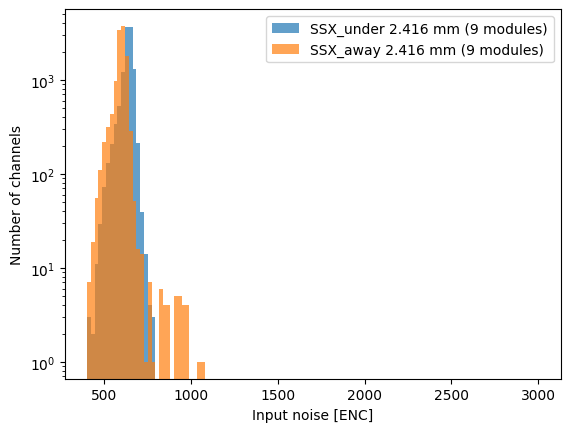

Number of SSY hybrids: 8

Number of SSY hybrids: 8
Subtype SSY has strip lengths 2.416 2.416


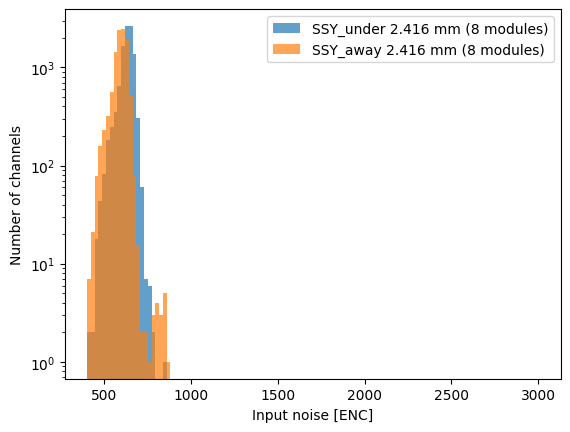

Number of LSX hybrids: 12

Number of LSX hybrids: 12
Subtype LSX has strip lengths 4.835 4.835


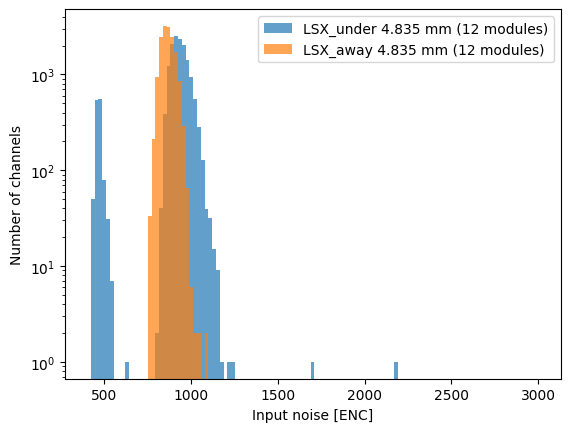

Number of LSY hybrids: 0



In [3]:
for subtype in allSubtypes:
    ECStripLengthNoiseComparison(subtype, variable="innse", verbose=False)

Number of SSX hybrids: 9
Number of SSY hybrids: 8
Number of LSX hybrids: 12
Number of LSY hybrids: 0

Number of LSX hybrids: 12
Subtype LSX has strip lengths 4.835 4.835


Number of R0H0 hybrids: 8
Subtype R0H0 has strip lengths 1.900 2.400

Number of R0H1 hybrids: 8
Subtype R0H1 has strip lengths 3.200 2.900

Number of R1H0 hybrids: 12
Subtype R1H0 has strip lengths 1.810 2.710

Number of R1H1 hybrids: 9
Subtype R1H1 has strip lengths 1.510 2.410

Number of R2H0 hybrids: 24
Subtype R2H0 has strip lengths 3.080 3.080

Number of R3H0 hybrids: 4
Subtype R3H0 has strip lengths 2.620 3.220

Number of R3H1 hybrids: 4
Subtype R3H1 has strip lengths 2.620 3.220

Number of R3H2 hybrids: 4
Subtype R3H2 has strip lengths 2.620 3.220

Number of R3H3 hybrids: 4
Subtype R3H3 has strip lengths 2.620 3.220

Number of R4H0 hybrids: 10
Subtype R4H0 has strip lengths 5.460 5.460

Number of R4H1 hybrids: 10
Subtype R4H1 has strip lengths 5.460 5.460

Number of R5H0 hybrids: 4
Subtype R5H0 has strip lengt

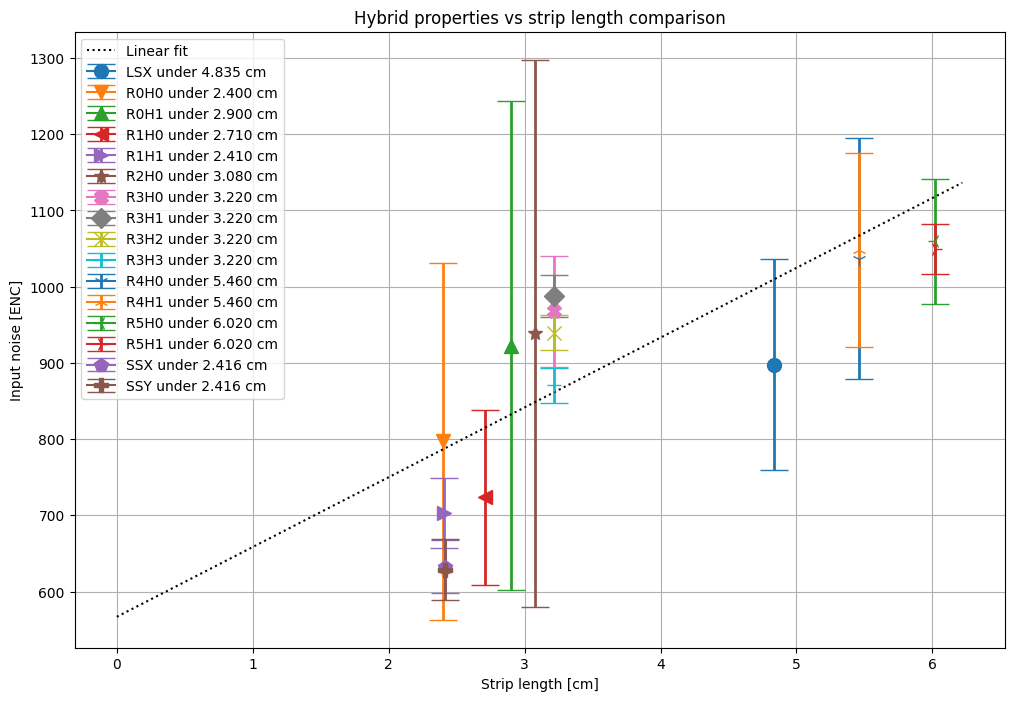

In [5]:
ECStripLengthNoiseComparison(subtypes, variable="innse", verbose=False,
                             figsize=(12, 8), showHist=False, showComp=True,
                             streams=[0])

In [5]:
import json
import glob
import matplotlib.pyplot as plt
jsonPath = "../../data/"

In [6]:
jsons = []
files = glob.glob(jsonPath + "*.json")
for file in files:
    with open(file, 'r') as f:
        jsons.append(json.load(f))

In [7]:
noneJs = {}
okJs = {}
points = []
dateDict = {}
componentInfo = {}
R0H1count = 0
noneAddressList = []
addressList = []
for jsonNumber, js in enumerate(jsons):
    go = False
    itsdaqVersion = None
    addresses = None
    for d in js["properties"]:
        if d["code"] == "scan_info":
            if len(d["value"]["points"]) == 10:
                if js["components"][0]["type"]["code"] == "R0H1":
                    R0H1count += 1
                if js["components"][0]["testedAtStage"]["code"] == "ON_MODULE":
                    go = True
        if d["code"] == "system_info":
            itsdaqVersion = d["value"]["GIT commit date"][:10]
        if d["code"] == "det_info":
            addresses = d["value"]["Address"]
    
    if itsdaqVersion and addresses:
        noneAddress = False
        for address in addresses:
            if address is None:
                noneAddress = True
        if noneAddress:
            noneAddressList.append(itsdaqVersion)
            if itsdaqVersion in noneJs.keys():
                noneJs[itsdaqVersion].append((js, jsonNumber))
            else:
                noneJs[itsdaqVersion] = [(js, jsonNumber)]
        else:
            addressList.append(itsdaqVersion)
            if itsdaqVersion in okJs.keys():
                okJs[itsdaqVersion].append((js, jsonNumber))
            else:
                okJs[itsdaqVersion] = [(js, jsonNumber)]
    
    if go:
        testDate = js["date"].split("T")[0]
        points.append((testDate, itsdaqVersion))
        
        if testDate in dateDict.keys():
            dateDict[testDate].append(itsdaqVersion)
        else:
            dateDict[testDate] = [itsdaqVersion]
        component = js["components"][0]
        sn = component["serialNumber"]
        subtype = component["type"]["code"]
        
        
        if sn in componentInfo.keys():
            componentInfo[sn]["count"] += 1
        else:
            componentInfo[sn] = {"count" : 1,
                                 "subtype" : subtype}
            for result in js["results"]:
                componentInfo[sn][result["code"]] = result["value"]
                
points.sort(key=lambda x: x[0])
testDates = list(set([point[0] for point in points]))
sizes = {}
for date in testDates:
    sizes[date] = len(dateDict[date])*25

/tmp/ipykernel_16590/3944766853.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation = 90);


Text(0, 0.5, 'ITSDAQ commit date')

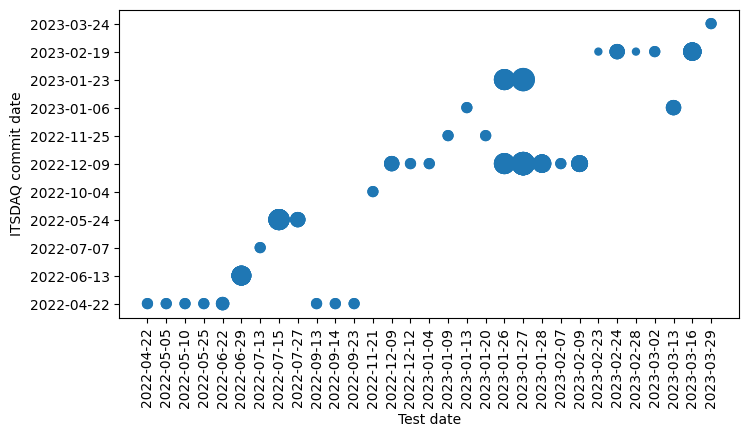

In [8]:
fig = plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.scatter([point[0] for point in points], [point[1] for point in points], s=[sizes[point[0]] for point in points])
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, rotation = 90);
plt.xlabel("Test date")
plt.ylabel("ITSDAQ commit date")

In [9]:
okSubtypes = []
noneSubtypes = []
for itsdaqVersion in okJs:
        for js, jsNumber in okJs[itsdaqVersion]:
            subtype = js["components"][0]["type"]["code"]
            okSubtypes.append(subtype)
            if subtype in ['R3H2', 'R3H3', 'R1H0', 'R0H1']:
                print(subtype, jsNumber, itsdaqVersion)
print("---")

for itsdaqVersion in noneJs:
        for js, jsNumber in noneJs[itsdaqVersion]:
            subtype = js["components"][0]["type"]["code"]
            noneSubtypes.append(subtype)
            if subtype in ['R3H2', 'R3H3', 'R1H0', 'R0H1']:
                print(subtype, jsNumber, itsdaqVersion)

R1H0 27 2022-04-22
R0H1 226 2022-04-22
R0H1 14 2022-05-24
R0H1 18 2022-05-24
R1H0 21 2022-05-24
R1H0 24 2022-05-24
R1H0 63 2022-05-24
R1H0 91 2022-05-24
R1H0 107 2022-05-24
R0H1 148 2022-05-24
R0H1 180 2022-05-24
R1H0 230 2022-05-24
R1H0 105 2022-10-04
R1H0 221 2022-10-04
R1H0 42 2022-12-09
R1H0 54 2022-12-09
R1H0 115 2022-12-09
R1H0 125 2022-12-09
R1H0 131 2022-12-09
R1H0 175 2022-12-09
R1H0 211 2022-12-09
R1H0 47 2023-02-19
R1H0 101 2023-02-19
R1H0 146 2023-02-19
R1H0 162 2023-02-19
R1H0 182 2023-02-19
R1H0 208 2023-02-19
R1H0 64 2022-02-23
R1H0 103 2022-02-23
R0H1 124 2022-02-23
R1H0 121 2022-11-14
R1H0 204 2022-11-14
R1H0 214 2022-11-14
R1H0 89 2023-03-24
R0H1 222 2023-01-06
R0H1 239 2023-01-06
---
R3H3 4 2022-05-24
R3H2 28 2022-05-24
R0H1 69 2022-05-24
R3H3 71 2022-05-24
R3H2 140 2022-05-24
R0H1 243 2022-05-24
R0H1 17 2022-04-22
R0H1 33 2022-04-22
R0H1 51 2022-04-22
R0H1 167 2022-04-22
R1H0 56 2022-07-25
R1H0 110 2022-07-25
R1H0 166 2022-07-25
R1H0 201 2022-07-25
R3H2 76 2023-02-1

In [10]:
files[186]

'../../data/63e1da1d6cd28a0036d3b1dc.json'

In [11]:
jsons[186]

{'id': '63e1da1d6cd28a0036d3b1dc',
 'state': 'ready',
 'stateTs': '2023-02-07T04:57:01.951Z',
 'stateUserIdentity': '22-1535-1',
 'date': '2023-01-26T22:01:36.000Z',
 'testType': {'id': '6203775e987fb9000ab4f245',
  'code': 'RESPONSE_CURVE_PPA',
  'name': 'Response Curve PPA',
  'state': 'active'},
 'institution': {'id': '5a83234ddaf1a000052e3e9f',
  'code': 'TRIUMF',
  'name': 'TRIUMF'},
 'user': {'id': '5b09a173e675110005b83121',
  'userIdentity': '22-1535-1',
  'firstName': 'Luise',
  'middleName': '',
  'lastName': 'Poley'},
 'runNumber': '2617-6',
 'passed': True,
 'problems': False,
 'properties': [{'code': 'DCS',
   'name': 'DCS info',
   'dataType': 'object',
   'valueType': 'single',
   'required': False,
   'value': {'ABC_temp_raw_10': 2332,
    'ABC_temp_raw_3': 2545,
    'ABC_temp_raw_4': 2464,
    'ABC_temp_raw_5': 2397,
    'ABC_temp_raw_6': 2399,
    'ABC_temp_raw_7': 2468,
    'ABC_temp_raw_8': 2471,
    'ABC_temp_raw_9': 2409,
    'HCC_temp_raw': 426,
    'Module 1_cur

In [12]:
noneJs.keys()

dict_keys(['2022-05-24', '2022-04-22', '2022-07-25', '2023-02-19', '2023-01-23', '2023-01-06'])

In [13]:
keys = jsons[206].keys()
for key in keys:
    if key == "results":
        continue
    print(key)
    print(jsons[206][key])
    print(jsons[220][key])
    print()

id
63fe9d874069b50036fadfa9
63e1d7946cd28a0036d3afe4

state
ready
ready

stateTs
2023-03-01T00:34:15.249Z
2023-02-07T04:46:12.262Z

stateUserIdentity
22-1535-1
22-1535-1

date
2023-02-28T22:37:06.000Z
2023-01-28T02:03:12.000Z

testType
{'id': '6203775e987fb9000ab4f245', 'code': 'RESPONSE_CURVE_PPA', 'name': 'Response Curve PPA', 'state': 'active'}
{'id': '6203775e987fb9000ab4f245', 'code': 'RESPONSE_CURVE_PPA', 'name': 'Response Curve PPA', 'state': 'active'}

institution
{'id': '5a83234ddaf1a000052e3e9f', 'code': 'TRIUMF', 'name': 'TRIUMF'}
{'id': '5a83234ddaf1a000052e3e9f', 'code': 'TRIUMF', 'name': 'TRIUMF'}

user
{'id': '5b09a173e675110005b83121', 'userIdentity': '22-1535-1', 'firstName': 'Luise', 'middleName': '', 'lastName': 'Poley'}
{'id': '5b09a173e675110005b83121', 'userIdentity': '22-1535-1', 'firstName': 'Luise', 'middleName': '', 'lastName': 'Poley'}

runNumber
3042-8
2708-6

passed
True
False

problems
False
False

properties
[{'code': 'DCS', 'name': 'DCS info', 'dataType'

In [14]:
print(jsons[206]["properties"][5]["value"]["GIT commit date"])
print(jsons[220]["properties"][5]["value"]["GIT commit date"])

2023-02-19 22:48:07 +0000 (Sun, 19 Feb 2023)
2022-12-09 11:00:29 +0000 (Fri, 09 Dec 2022)


In [15]:
print(okJs['2023-02-19'][0][1], noneJs['2023-02-19'][0][1]

SyntaxError: unexpected EOF while parsing (3954689195.py, line 1)

In [16]:
files[206], files[65]

('../../data/63fe9d874069b50036fadfa9.json',
 '../../data/6234eacf192bfe000a3fb8fe.json')

In [17]:
js[]

SyntaxError: invalid syntax (3748610461.py, line 1)

/tmp/ipykernel_16590/2135482256.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation = 90);


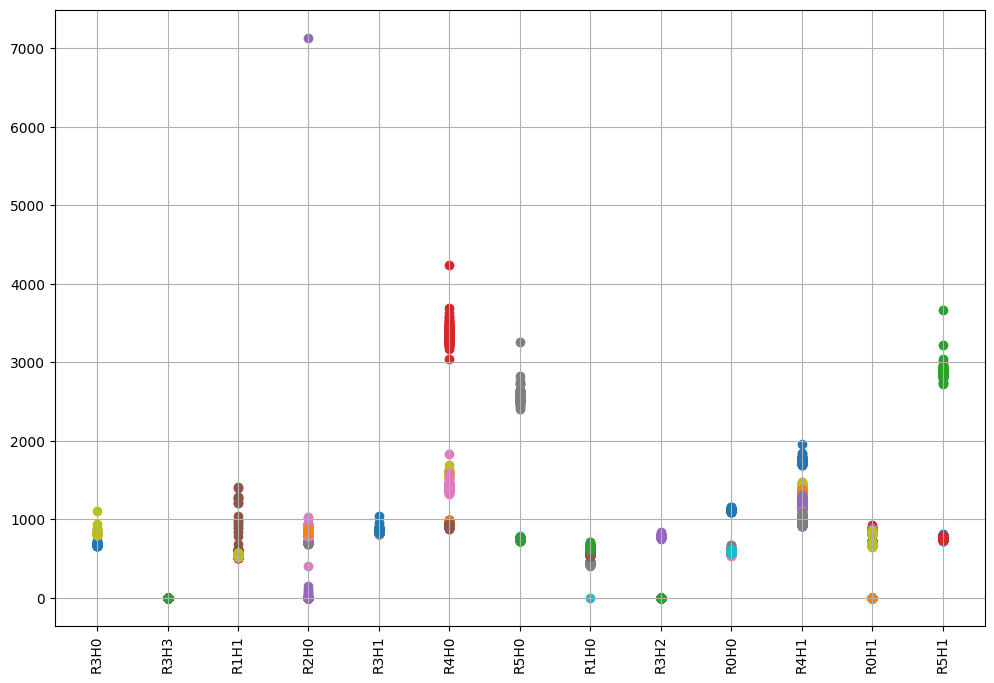

In [18]:
fig = plt.figure(figsize=(12, 8))
variable = "innse_away"
for key in componentInfo:
    points = componentInfo[key][variable][0]
    if isinstance(points, list):
        nPoints = len(points)
        plt.scatter([componentInfo[key]["subtype"]]*nPoints, componentInfo[key][variable][0])
ax = plt.gca()
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, rotation = 90);
#plt.axhline(400, *ax.get_xlim(), linestyle=":")
plt.grid()

In [19]:
for component in componentInfo:
    print(component, componentInfo[component]["count"], componentInfo[component]["subtype"])

20USEH50000014 2 R3H0
20USEH80000011 2 R3H3
20USEH30000025 1 R1H1
20USEH40000027 6 R2H0
20USEH40000024 4 R2H0
20USEH30000012 1 R1H1
20USEH40000059 4 R2H0
20USEH60000010 2 R3H1
20USEH90000029 2 R4H0
20USEHB0000027 1 R5H0
20USEH60000012 2 R3H1
20USEH20000015 1 R1H0
20USEH70000009 2 R3H2
20USEH30000035 1 R1H1
20USEH00000208 1 R0H0
20USEH90000035 1 R4H0
20USEH20000026 1 R1H0
20USEH20000028 2 R1H0
20USEH50000013 2 R3H0
20USEH20000032 2 R1H0
20USEHA0000030 2 R4H1
20USEH10000031 2 R0H1
20USEH80000010 2 R3H3
20USEH00000210 1 R0H0
20USEH70000010 2 R3H2
20USEH30000020 1 R1H1
20USEH90000027 1 R4H0
20USEH40000057 2 R2H0
20USEHB0000026 1 R5H0
20USEH20000037 1 R1H0
20USEH10000029 1 R0H1
20USEH30000024 1 R1H1
20USEHC0000012 1 R5H1
20USEH90000026 1 R4H0
20USEHA0000044 1 R4H1
20USEH30000022 1 R1H1
20USEH40000056 2 R2H0
20USEH90000042 1 R4H0
20USEHA0000033 1 R4H1
20USEH20000033 1 R1H0
20USEHA0000043 1 R4H1
20USEH40000026 5 R2H0
20USEHA0000039 1 R4H1
20USEH30000021 1 R1H1
20USEH40000025 1 R2H0
20USEH2000

In [20]:
subtypeCounts = {}
for subtype in subtypes:
    subtypeCounts[subtype] = [0, 0];
    for component in componentInfo:
        if componentInfo[component]["subtype"] == subtype:
            subtypeCounts[subtype][0] += 1
            subtypeCounts[subtype][1] += componentInfo[component]["count"]

In [21]:
print("{head1:>8} {mod:>8} {tests:>6}".format(head1="Subtype", mod="#modules", tests="#tests"))
subtypeCounts["SSX"] = ["?", 9]
subtypeCounts["SSY"] = ["?", 8]
subtypeCounts["LSX"] = ["?", 12]
for subtype in subtypes:
    print("{head1:>8} {mod:>8} {tests:>6}".format(head1=subtype, mod=subtypeCounts[subtype][0], tests=subtypeCounts[subtype][1]))

 Subtype #modules #tests
    R0H0        7      8
    R0H1        7      8
    R1H0       10     12
    R1H1        9      9
    R2H0        7     24
    R3H0        2      4
    R3H1        2      4
    R3H2        2      4
    R3H3        2      4
    R4H0        9     10
    R4H1        9     10
    R5H0        4      4
    R5H1        4      4
     SSX        ?      9
     SSY        ?      8
     LSX        ?     12
     LSY        0      0


In [23]:
Number of SSX hybrids: 9
Number of SSY hybrids: 8
Number of LSX hybrids: 12
Number of LSY hybrids: 0

SyntaxError: invalid syntax (1328575295.py, line 1)

In [24]:
import sys
sys.path.append("../../parsers/")
from RCparsers import parseRC

In [25]:
hybrid = parseRC("../../data/63c6126d3f47660036fc2fad.json")

Parsing file: ../../data/63c6126d3f47660036fc2fad.json
Addresses [None, None, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [26]:
import json

In [27]:
with open("../../data/63c6126d3f47660036fc2fad.json", 'r') as f:
    data = json.load(f)

In [28]:
hej = ["62f5568c8bb668000a1bbdff", "62f556868bb668000a1bbdd9", "63c611ef3ae21f0036ca3653", "62c58bf8e684f9000a0b8f63", "627bdd03ba163f000ab8002c", "627bdd07ba163f000ab80057", "62f558488bb668000a1bc024", "63c611f63f47660036fc2da7", "62f5584e8bb668000a1bc048"]

In [29]:
len(hej)

9

In [30]:
len(files)

251

In [31]:
moduleIDfiles = glob.glob("../Helpers/jsonFiles/*.json")

In [32]:
subtypeFileCount = {}
for file in moduleIDfiles:
    with open(file, "r") as f:
        js = json.load(f)
    subtype = file.split("/")[-1].strip("data.json")
    subtypeFileCount[subtype] = len(js["bonded_itkdb_testids"])

In [33]:
subtypeFileCount

{'R1H0': 12,
 'R4H1': 10,
 'R3H3': 4,
 'R3H1': 4,
 'R5H0': 4,
 'R5H1': 4,
 'R0H0': 8,
 'R3H0': 4,
 'R4H0': 10,
 'R0H1': 8,
 'R2H0': 24,
 'R3H2': 4,
 'R1H1': 9}